### 1. 파일 불러오기

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns  
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc 
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name() 
rc('font', family=font_name)

In [2]:
df = pd.read_csv('c:/프로젝트/Hotel Review/Data/score_jeju50_0602_1.csv', encoding = "cp949",index_col=0)
df.head() 

,score,prov,score_av,grade,room,bf,shuttle,L_checkin,disa,user_Hotel
name,,,,,,,,,,
랜딩관 제주신화월드 호텔앤리조트,8.0,서귀포시,8,5,432,0,1,0,1,670
메리어트관 제주신화월드 호텔앤리조트,8.0,서귀포시,8,5,432,0,1,0,1,670
랜딩관 제주신화월드 호텔앤리조트,8.0,서귀포시,8,5,432,0,1,0,1,670
메리어트관 제주신화월드 호텔앤리조트,8.0,서귀포시,8,5,432,0,1,0,1,670
신화관 제주신화월드 호텔앤리조트,8.0,서귀포시,8,5,432,0,1,0,1,670


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36865 entries, 랜딩관 제주신화월드 호텔앤리조트 to 호텔 케니 모슬포
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   score       36865 non-null  float64
 1   prov        36865 non-null  object 
 2   score_av    36865 non-null  int64  
 3   grade       36865 non-null  int64  
 4   room        36865 non-null  int64  
 5   bf          36865 non-null  int64  
 6   shuttle     36865 non-null  int64  
 7   L_checkin   36865 non-null  int64  
 8   disa        36865 non-null  int64  
 9   user_Hotel  36865 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 3.1+ MB


In [4]:
df.isnull().sum()

score         0
prov          0
score_av      0
grade         0
room          0
bf            0
shuttle       0
L_checkin     0
disa          0
user_Hotel    0
dtype: int64

### 2. EDA

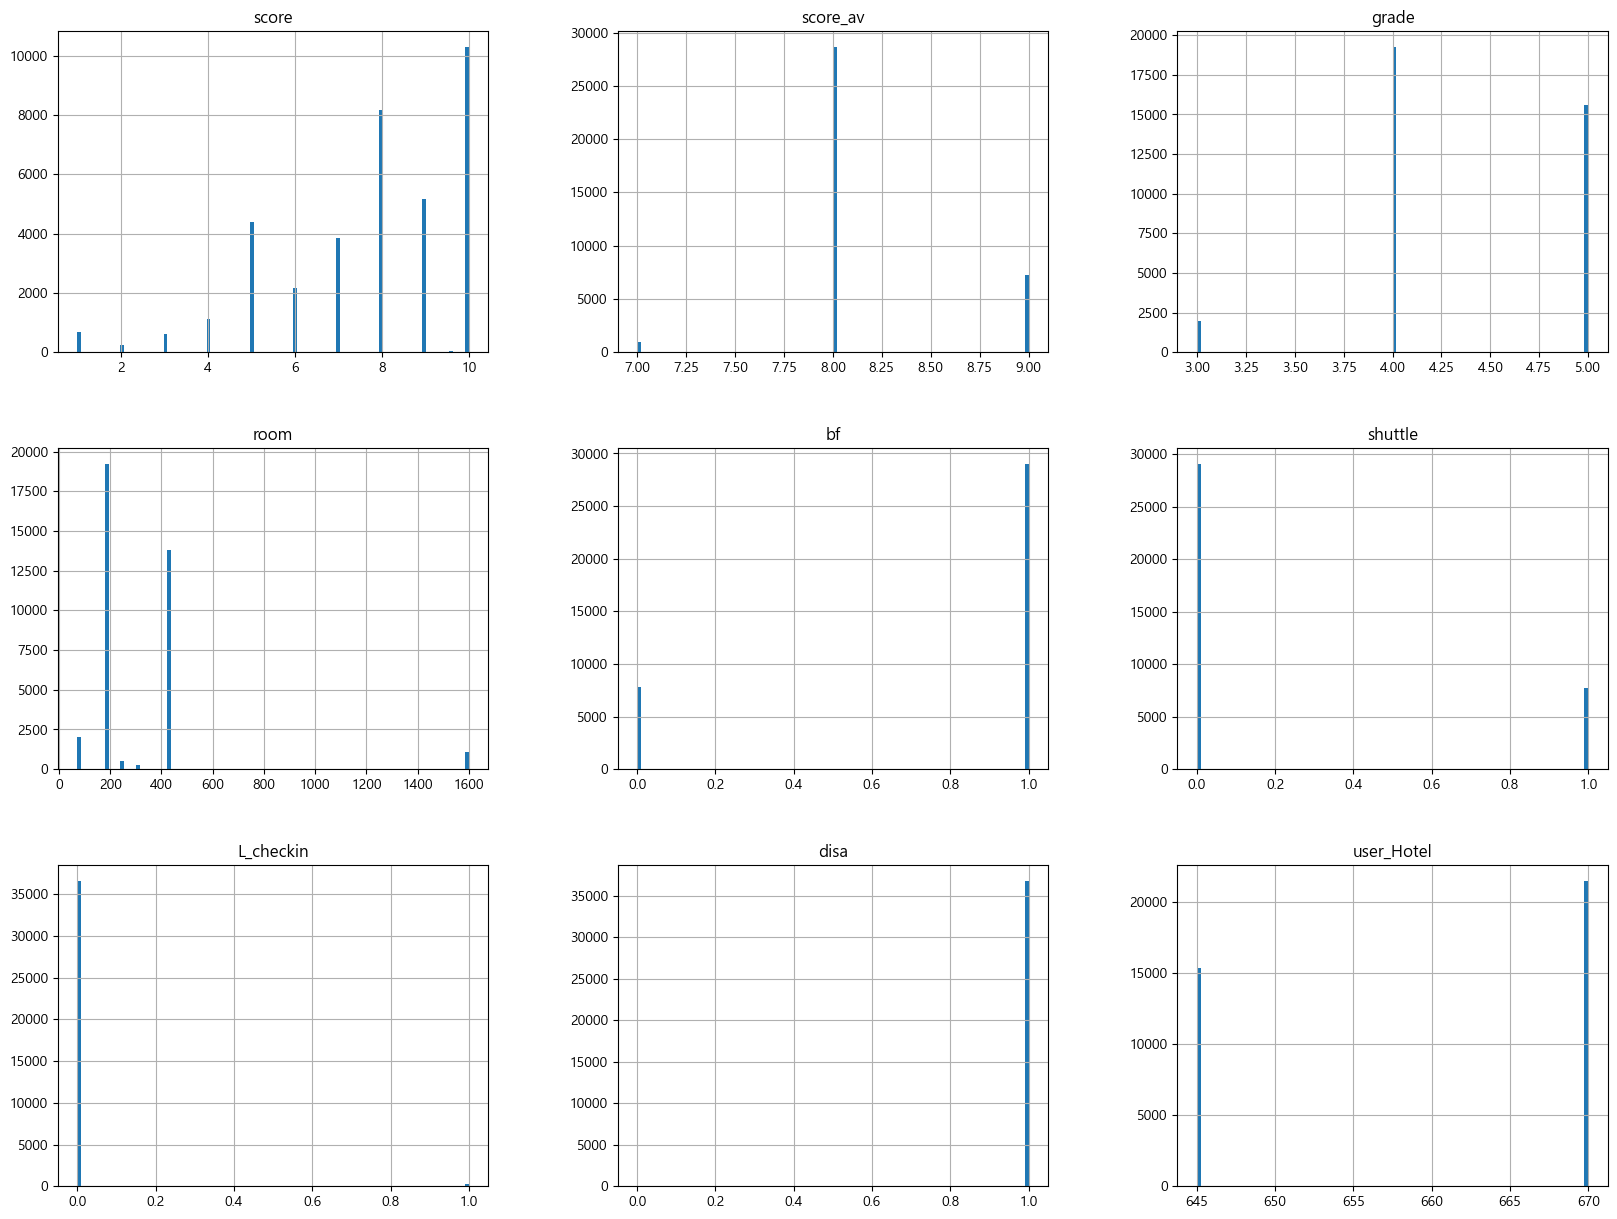

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=100, figsize=(20,15))
plt.show() 


C:\Users\tjoeun\AppData\Local\Temp\ipykernel_11956\3412128453.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sns.pairplot(df[{'score','grade','score_av','room','user_Hotel'}].sample(frac=0.05))


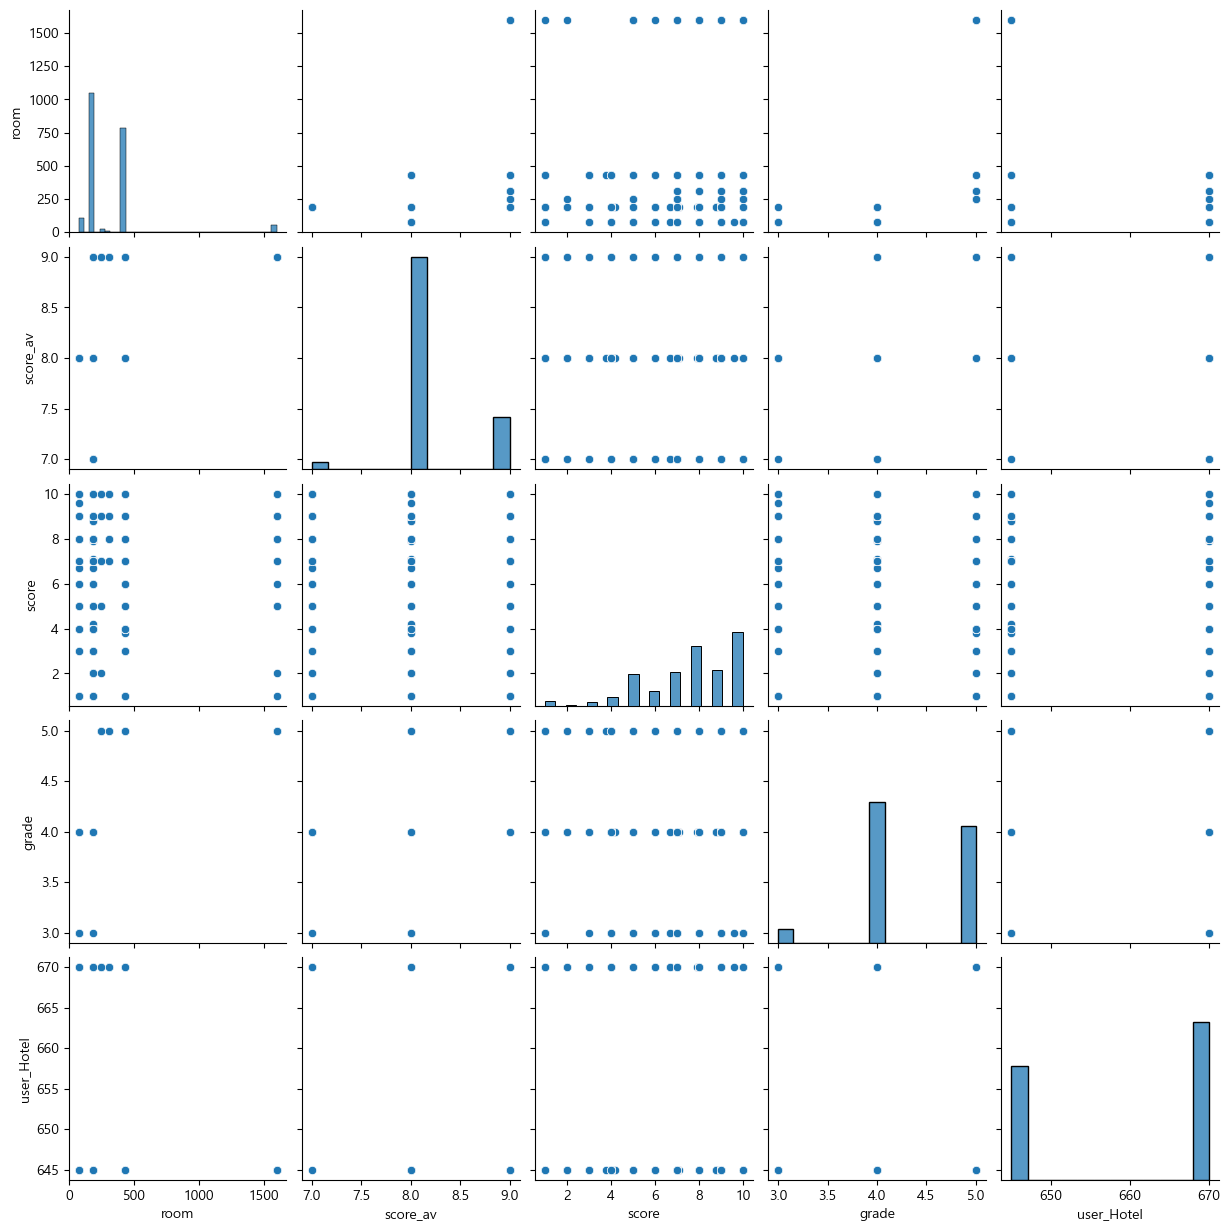

In [6]:
#주요 변수 Pairplot
sns.pairplot(df[{'score','grade','score_av','room','user_Hotel'}].sample(frac=0.05))
plt.show()

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
score,36865.0,7.750411,2.152864,1.0,6.7,8.0,10.0,10.0
score_av,36865.0,8.170758,0.438493,7.0,8.0,8.0,8.0,9.0
grade,36865.0,4.369944,0.583070,3.0,4.0,4.0,5.0,5.0
room,36865.0,313.004367,254.731187,72.0,184.0,184.0,432.0,1600.0
bf,36865.0,0.787522,0.409067,0.0,1.0,1.0,1.0,1.0
shuttle,36865.0,0.210254,0.407494,0.0,0.0,0.0,0.0,1.0
L_checkin,36865.0,0.007134,0.084163,0.0,0.0,0.0,0.0,1.0
disa,36865.0,0.997776,0.047111,0.0,1.0,1.0,1.0,1.0
user_Hotel,36865.0,659.573444,12.327001,645.0,645.0,670.0,670.0,670.0


In [8]:
df_score = df.groupby('score').mean()
df_score

,score_av,grade,room,bf,shuttle,L_checkin,disa,user_Hotel
score,,,,,,,,
1.0,8.019461,4.309880,310.919162,0.803892,0.191617,0.007485,0.995509,660.157186
2.0,8.055556,4.217949,286.111111,1.000000,0.000000,0.008547,1.000000,656.111111
3.0,8.014754,4.131148,262.852459,0.995082,0.000000,0.006557,0.995082,656.926230
3.8,8.000000,4.250000,246.000000,1.000000,0.000000,0.000000,1.000000,651.250000
4.0,8.043789,4.302055,286.141197,0.852547,0.146559,0.000000,0.999106,658.695264
4.2,8.000000,4.000000,184.000000,1.000000,0.000000,0.000000,1.000000,645.000000
4.6,8.000000,4.166667,225.333333,1.000000,0.000000,0.000000,1.000000,657.500000
5.0,8.028291,4.651837,359.652293,0.391741,0.607347,0.001825,0.999087,664.581337
5.8,8.000000,4.000000,184.000000,1.000000,0.000000,0.000000,1.000000,645.000000


(3.5, 4.884428473648186)

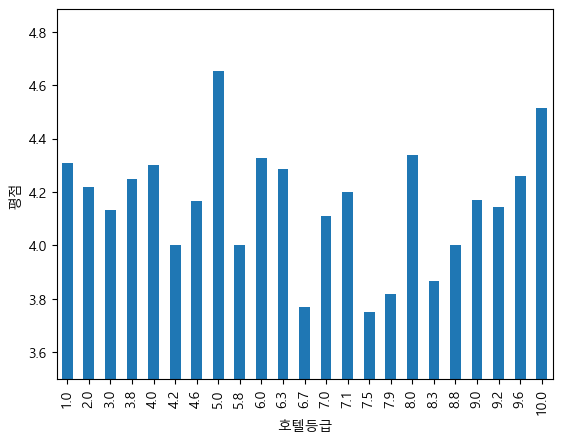

In [9]:
df_score['grade'].plot(kind='bar')
# plt.title('호텔등급 별 평점')
plt.xlabel('호텔등급')
plt.ylabel('평점')
plt.ylim(3.5) 


In [10]:
df_grade = df.groupby('grade').mean()
df_grade

,score,score_av,room,bf,shuttle,L_checkin,disa,user_Hotel
grade,,,,,,,,
3,7.728782,7.991371,72.966497,0.991371,0.000000,0.008629,0.991371,665.418782
4,7.704018,8.081765,183.622544,0.996630,0.000000,0.000000,0.996630,654.791569
5,7.810469,8.303370,503.180036,0.503396,0.496604,0.015761,1.000000,664.744682


(7.0, 8.200992439774474)

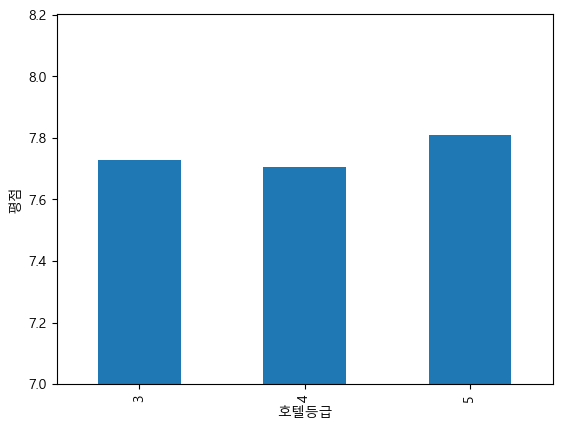

In [11]:
df_grade['score'].plot(kind='bar') 
# plt.title('리뷰 평점 별 호텔등급')
plt.xlabel('호텔등급')
plt.ylabel('평점')
plt.ylim(7)

In [12]:
df_prov = df.groupby('prov').mean()

df_prov= df_prov[{'score', 'grade'}]
df_prov

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_11956\4139403432.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_prov= df_prov[{'score', 'grade'}]


,grade,score
prov,,
서귀포시,4.498744,7.694165
제주시,4.189919,7.829028


In [13]:
df_prov_t = df_prov.transpose()


Text(0, 0.5, '평점')

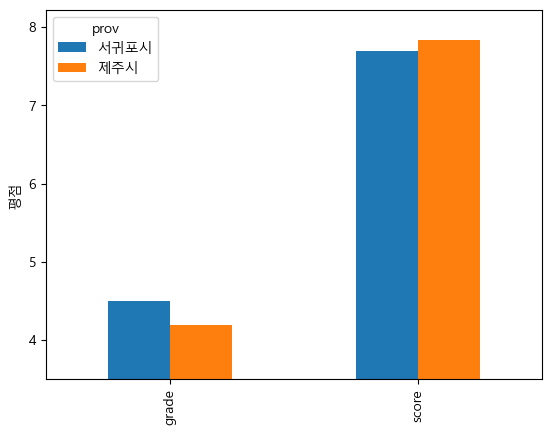

In [14]:
df_prov_t.plot(kind="bar")
plt.ylim(3.5)
#plt.title("지역별 평점 및 호텔등급")
plt.ylabel("평점")

### 3. 상관분석

In [15]:
round(df.corr(),2)

,score,score_av,grade,room,bf,shuttle,L_checkin,disa,user_Hotel
score,1.00,0.22,0.02,0.04,0.09,-0.09,0.04,-0.01,-0.03
score_av,0.22,1.00,0.26,0.36,0.04,-0.03,0.14,0.04,-0.12
grade,0.02,0.26,1.00,0.63,-0.55,0.56,0.07,0.05,0.26
room,0.04,0.36,0.63,1.00,-0.24,0.24,-0.00,0.04,-0.01
bf,0.09,0.04,-0.55,-0.24,1.00,-0.99,0.03,0.09,-0.43
shuttle,-0.09,-0.03,0.56,0.24,-0.99,1.00,-0.04,0.02,0.44
L_checkin,0.04,0.14,0.07,-0.00,0.03,-0.04,1.00,-0.11,0.06
disa,-0.01,0.04,0.05,0.04,0.09,0.02,-0.11,1.00,0.06
user_Hotel,-0.03,-0.12,0.26,-0.01,-0.43,0.44,0.06,0.06,1.00


c:\Anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


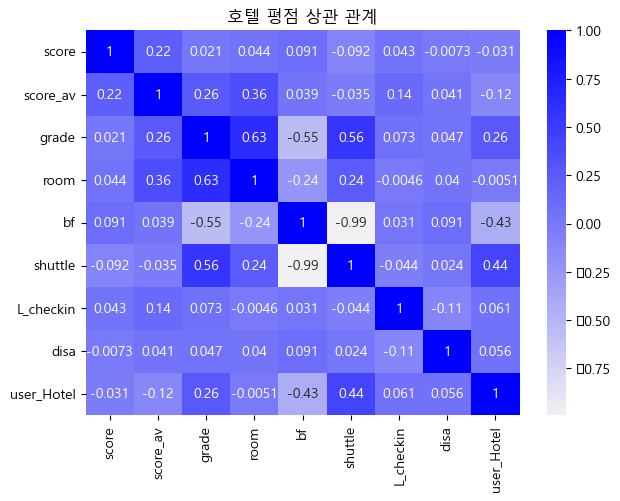

In [16]:
plt.figure(figsize=(7,5))
plt.title('호텔 평점 상관 관계')
cmap= sns.light_palette('blue', as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap=cmap)
plt.show()

<Axes: xlabel='user_Hotel', ylabel='score'>

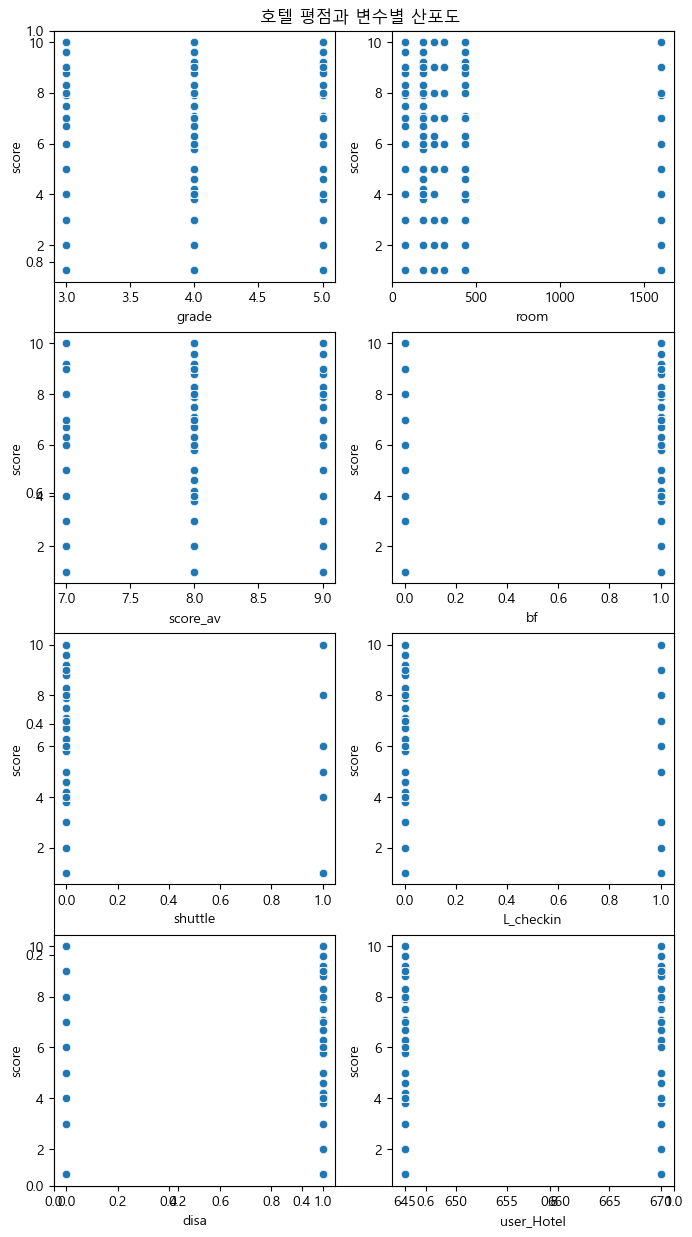

In [17]:
fig =plt.figure(figsize=(8,15))
plt.title("호텔 평점과 변수별 산포도 ")
ax1 = fig.add_subplot(4,2,1)
ax2 = fig.add_subplot(4,2,2)
ax3 = fig.add_subplot(4,2,3)
ax4 = fig.add_subplot(4,2,4)
ax5 = fig.add_subplot(4,2,5)
ax6 = fig.add_subplot(4,2,6)
ax7 = fig.add_subplot(4,2,7)
ax8 = fig.add_subplot(4,2,8) 

sns.scatterplot(data=df, x='grade', y='score', ax=ax1)
sns.scatterplot(data=df, x='room', y='score', ax=ax2)
sns.scatterplot(data=df, x='score_av', y='score', ax=ax3)
sns.scatterplot(data=df, x='bf', y='score', ax=ax4)
sns.scatterplot(data=df, x='shuttle', y='score', ax=ax5)
sns.scatterplot(data=df, x='L_checkin', y='score', ax=ax6)
sns.scatterplot(data=df, x='disa', y='score', ax=ax7)
sns.scatterplot(data=df, x='user_Hotel', y='score', ax=ax8)
 
 

### 4. 회귀분석

In [18]:
# 독립변수/종속변수
df1=pd.DataFrame(df)
score_label = df1['score'].copy()
df1.drop({'score', 'prov'},axis=1, inplace=True)
df1.head() 

,score_av,grade,room,bf,shuttle,L_checkin,disa,user_Hotel
name,,,,,,,,
랜딩관 제주신화월드 호텔앤리조트,8,5,432,0,1,0,1,670
메리어트관 제주신화월드 호텔앤리조트,8,5,432,0,1,0,1,670
랜딩관 제주신화월드 호텔앤리조트,8,5,432,0,1,0,1,670
메리어트관 제주신화월드 호텔앤리조트,8,5,432,0,1,0,1,670
신화관 제주신화월드 호텔앤리조트,8,5,432,0,1,0,1,670


In [19]:
X = df1    
y= score_label

In [20]:
# 회귀분석 (R-squred ) 0.932
import statsmodels.api as sm

model = sm.OLS(y, X)
result = model.fit()
print("모형의적합성_R2 :",result.rsquared)
result.summary()

모형의적합성_R2 : 0.9324451111579365


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  score   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                          7.268e+04
Date:                Thu, 08 Jun 2023   Prob (F-statistic):                        0.00
Time:                        11:53:04   Log-Likelihood:                         -79497.
No. Observations:               36865   AIC:                                  1.590e+05
Df Residuals:                   36858   BIC:                                  1.591e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
score_av       1.0261      0.026     40.020      0.000       0.976       1.076
grade          0.1428      0.029      4.882      0.000       0.085       0.200
room          -0.0003   5.83e-05     -4.448      0.000      -0.000      -0.000
bf            -0.1979      0.075     -2.632      0.009      -0.345      -0.051
shuttle       -0.7200      0.081     -8.862      0.000      -0.879      -0.561
L_checkin      0.1162      0.133      0.875      0.381      -0.144       0.376
disa          -0.9179      0.153     -6.001      0.000      -1.218      -0.618
user_Hotel   7.08e-05      0.000      0.160      0.873      -0.001       0.001
==============================================================================
Omnibus:                     4356.592   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6107.893
Skew:                          -0.935   Prob(JB):                         0.00
Kurtosis:                       3.692   Cond. No.                     8.89e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.55e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [21]:
#P-value 확인
pd.options.display.float_format = '{:.5f}'.format
print(result.pvalues)

score_av     0.00000
grade        0.00000
room         0.00001
bf           0.00850
shuttle      0.00000
L_checkin    0.38148
disa         0.00000
user_Hotel   0.87263
dtype: float64


In [22]:
# P-value 유효한 순으로 변수 선정
X = df1[{'score_av','grade','shuttle', 'disa','room', 'bf'}] 
y= score_label

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_11956\2000628745.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X = df1[{'score_av','grade','shuttle', 'disa','room', 'bf'}]


In [23]:
# 변수 선정 후 회귀분석 0.932
import statsmodels.api as sm

model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  score   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                          1.018e+05
Date:                Thu, 08 Jun 2023   Prob (F-statistic):                        0.00
Time:                        11:53:05   Log-Likelihood:                         -79498.
No. Observations:               36865   AIC:                                  1.590e+05
Df Residuals:                   36860   BIC:                                  1.590e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bf            -0.1994      0.056     -3.561      0.000      -0.309      -0.090
room          -0.0003   5.42e-05     -4.937      0.000      -0.000      -0.000
score_av       1.0308      0.021     47.954      0.000       0.989       1.073
disa          -0.9230      0.112     -8.236      0.000      -1.143      -0.703
shuttle       -0.7235      0.061    -11.903      0.000      -0.843      -0.604
grade          0.1471      0.028      5.268      0.000       0.092       0.202
==============================================================================
Omnibus:                     4354.311   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6103.402
Skew:                          -0.935   Prob(JB):                         0.00
Kurtosis:                       3.691   Cond. No.                     2.08e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.39e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [24]:
## VIF 산출
from statsmodels.stats.outliers_influence import variance_inflation_factor  

vif = pd.DataFrame()
vif['VIF']=[variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['독립변수'] = df1.columns
vif =vif.sort_values('VIF').reset_index(drop=True)
vif  

c:\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,독립변수
0,1.06027,L_checkin
1,4.66756,room
2,140.25297,grade
3,371.16570,score_av
4,715.56679,user_Hotel
5,inf,bf
6,inf,shuttle
7,inf,disa


In [25]:
# VIF 유효한 순으로 변수 선정
X = df1[{'L_checkin','room'}] 
y= score_label
y=y.astype('int')

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_11956\3215269928.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X = df1[{'L_checkin','room'}]


In [26]:
# 변수 변경 후 회귀분석 0.57
import statsmodels.api as sm

model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  score   R-squared (uncentered):                   0.572
Model:                            OLS   Adj. R-squared (uncentered):              0.572
Method:                 Least Squares   F-statistic:                          2.462e+04
Date:                Thu, 08 Jun 2023   Prob (F-statistic):                        0.00
Time:                        11:53:05   Log-Likelihood:                     -1.1353e+05
No. Observations:               36865   AIC:                                  2.271e+05
Df Residuals:                   36863   BIC:                                  2.271e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
L_checkin      4.3592      0.325     13.408      0.000       3.722       4.996
room           0.0150    6.8e-05    220.204      0.000       0.015       0.015
==============================================================================
Omnibus:                    19205.843   Durbin-Watson:                   0.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           146591.089
Skew:                          -2.421   Prob(JB):                         0.00
Kurtosis:                      11.485   Cond. No.                     4.79e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 5. R-square 모형검증

In [27]:
df_p = pd.DataFrame(df) 
df_p.drop('prov',axis=1, inplace=True)

<Axes: >

c:\Anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


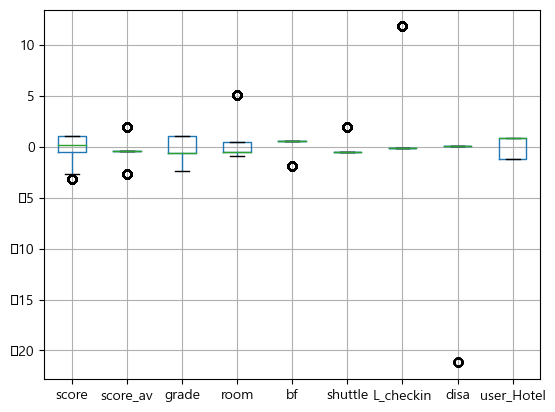

In [28]:
#스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
df_S = scaler.fit_transform(df_p) 
df_S1= pd.DataFrame(df_S,columns=df_p.columns)
df_S1.boxplot()

In [29]:
score_label1 = df_S1['score'].copy()
df_S1.drop('score',axis=1, inplace=True)
df_S1.head() 

,score_av,grade,room,bf,shuttle,L_checkin,disa,user_Hotel
0,-0.38943,1.08060,0.46715,-1.92519,1.93808,-0.08477,0.04722,0.84584
1,-0.38943,1.08060,0.46715,-1.92519,1.93808,-0.08477,0.04722,0.84584
2,-0.38943,1.08060,0.46715,-1.92519,1.93808,-0.08477,0.04722,0.84584
3,-0.38943,1.08060,0.46715,-1.92519,1.93808,-0.08477,0.04722,0.84584
4,-0.38943,1.08060,0.46715,-1.92519,1.93808,-0.08477,0.04722,0.84584


In [30]:
X = df_S1  
y= score_label1

In [31]:
# 스케일링 후 회귀분석 0.058
import statsmodels.api as sm

model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  score   R-squared (uncentered):                   0.058
Model:                            OLS   Adj. R-squared (uncentered):              0.058
Method:                 Least Squares   F-statistic:                              283.9
Date:                Thu, 08 Jun 2023   Prob (F-statistic):                        0.00
Time:                        11:53:06   Log-Likelihood:                         -51207.
No. Observations:               36865   AIC:                                  1.024e+05
Df Residuals:                   36857   BIC:                                  1.025e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
score_av       0.2250      0.006     36.993      0.000       0.213       0.237
grade          0.0337      0.009      3.608      0.000       0.015       0.052
room          -0.0313      0.007     -4.544      0.000      -0.045      -0.018
bf          -9.87e+11   1.09e+12     -0.909      0.363   -3.12e+12    1.14e+12
shuttle    -9.832e+11   1.08e+12     -0.909      0.363    -3.1e+12    1.14e+12
L_checkin      0.0008      0.005      0.154      0.877      -0.009       0.011
disa        1.137e+11   1.25e+11      0.909      0.363   -1.31e+11    3.59e+11
user_Hotel     0.0361      0.006      6.245      0.000       0.025       0.047
==============================================================================
Omnibus:                     4334.154   Durbin-Watson:                   0.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6073.747
Skew:                          -0.930   Prob(JB):                         0.00
Kurtosis:                       3.703   Cond. No.                     5.15e+14
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 3.98e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [32]:
## VIF 산출
from statsmodels.stats.outliers_influence import variance_inflation_factor  

vif = pd.DataFrame()
vif['VIF']=[variance_inflation_factor(df_S1.values, i) for i in range(df_S1.shape[1])]
vif['독립변수'] = df_S1.columns
vif =vif.sort_values('VIF').reset_index(drop=True)
vif  

c:\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,독립변수
0,1.06381,L_checkin
1,1.22552,score_av
2,1.30319,user_Hotel
3,1.85981,room
4,2.45028,grade
5,inf,bf
6,inf,shuttle
7,inf,disa


In [33]:
X = df_S1[{'L_checkin','score_av','user_Hotel', 'room', 'grade'}] 
y= score_label1
y=y.astype('int')

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_11956\1226028009.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X = df_S1[{'L_checkin','score_av','user_Hotel', 'room', 'grade'}]


In [34]:
# 변수 변경 후 회귀분석 0.57
import statsmodels.api as sm

model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  score   R-squared (uncentered):                   0.044
Model:                            OLS   Adj. R-squared (uncentered):              0.044
Method:                 Least Squares   F-statistic:                              339.3
Date:                Thu, 08 Jun 2023   Prob (F-statistic):                        0.00
Time:                        11:53:06   Log-Likelihood:                         -44485.
No. Observations:               36865   AIC:                                  8.898e+04
Df Residuals:                   36860   BIC:                                  8.902e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
L_checkin      0.0064      0.004      1.503      0.133      -0.002       0.015
room          -0.0251      0.006     -4.382      0.000      -0.036      -0.014
score_av       0.1792      0.005     38.795      0.000       0.170       0.188
grade          0.0062      0.006      1.077      0.281      -0.005       0.018
user_Hotel     0.0060      0.005      1.325      0.185      -0.003       0.015
==============================================================================
Omnibus:                     6615.191   Durbin-Watson:                   0.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13887.387
Skew:                          -1.066   Prob(JB):                         0.00
Kurtosis:                       5.121   Cond. No.                         2.45
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
X = df_S1  
y= score_label1
y=y.astype('int')

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
model = LinearRegression().fit(X_train, y_train)

print("학습용 : ", model.score(X_train, y_train))
print("검증용 : ", model.score(X_test, y_test))

학습용 :  0.04895099815965387
검증용 :  0.04778072001689848


In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
model = DecisionTreeRegressor().fit(X_train, y_train)

print("학습용 : ", model.score(X_train, y_train))
print("검증용 : ", model.score(X_test, y_test))

학습용 :  0.06718059749508143
검증용 :  0.06772570687730461


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
model = RandomForestRegressor(n_jobs = -1).fit(X_train, y_train)

print("학습용 : ", model.score(X_train, y_train))
print("검증용 : ", model.score(X_test, y_test))

학습용 :  0.0671688218493417
검증용 :  0.06766561314339004


In [39]:
#SVR
from sklearn.svm import SVR
model = SVR(kernel="linear")
model.fit(X_train, y_train)

print("학습용 : ", model.score(X_train, y_train))
print("검증용 : ", model.score(X_test, y_test))

학습용 :  0.026809163829485394
검증용 :  0.0262595162257917


In [40]:
#사례기반 추론 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
model_tr=knn.score(X_train, y_train)
model_te=knn.score(X_test, y_test)

print("학습용:",model_tr)
print("검증용:",model_te)

학습용: 0.4998643673706646
검증용: 0.5019891500904159


### 6. MSE 모형검증

In [41]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(df_S1, score_label1, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)

(29492, 8) (7373, 8)


In [42]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [43]:
from sklearn.metrics import mean_squared_error 
y_pred = lin_reg.predict(X_test) 
rms = np.sqrt(mean_squared_error(y_test, y_pred)) 
print("rmse_lin:",rms)

rmse_lin: 0.9688359975526865


In [44]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor() 
tree_reg.fit(X_train, y_train)

y_pred = tree_reg.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print("rmse_tree:",rms) 

rmse_tree: 0.9607942342793349


In [45]:
from sklearn.svm import SVR    

svm_reg = SVR(kernel="linear")
 
svm_reg.fit(X_train, y_train)

y_pred =svm_reg.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print("rmse_SVR:",rms)

rmse_SVR: 0.9958904405604954


In [46]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_jobs = -1)
forest_reg.fit(X_train, y_train)

y_pred = forest_reg.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print("rmse_RF:",rms)

rmse_RF: 0.9607458102864214


In [47]:
#Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3,10,30,50,100], 'max_features':[2,4,6,8]}, 
]    
forest_reg = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 50, 100]}])

In [48]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 50}

In [49]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=50, n_jobs=-1,
                      random_state=0)

Text(0, 0.5, 'features')

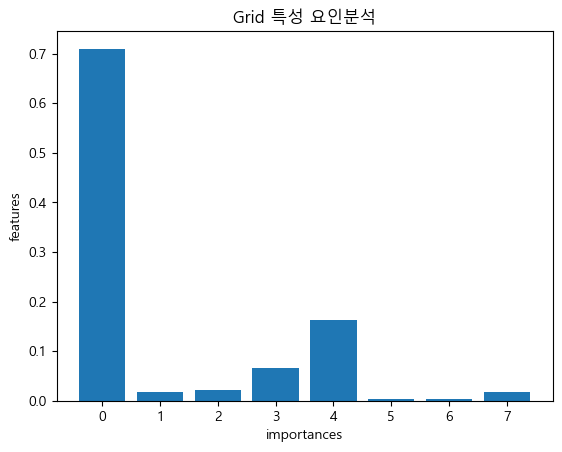

In [50]:
feature_importances = grid_search.best_estimator_.feature_importances_
plt.bar(range(len(feature_importances)), feature_importances)
plt.title ('Grid 특성 요인분석')
plt.xlabel("importances")
plt.ylabel("features") 

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {
 'n_estimators': randint(low=1, high=100), #1~100
 'max_features': randint(low=1, high=8), # 1~8 / 랜덤으로 조합을 만듬
 }
forest_reg = RandomForestRegressor(random_state=0, n_jobs=-1)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs, cv=5, random_state=0)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001505A2AE700>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001505AAD77F0>},
                   random_state=0)

In [52]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],
cvres["params"]):
 print(np.sqrt(mean_score), params)

0.2712988723233067 {'max_features': 5, 'n_estimators': 48}
0.27125065847308566 {'max_features': 6, 'n_estimators': 65}
0.2712536397114167 {'max_features': 4, 'n_estimators': 68}
0.2712677816024769 {'max_features': 2, 'n_estimators': 84}
0.2713108313296233 {'max_features': 6, 'n_estimators': 37}
0.2712835209045783 {'max_features': 7, 'n_estimators': 89}
0.271130973645773 {'max_features': 1, 'n_estimators': 13}
0.2712508539294712 {'max_features': 3, 'n_estimators': 66}
0.2713115897545372 {'max_features': 7, 'n_estimators': 40}
0.2712835209045783 {'max_features': 7, 'n_estimators': 89}


In [53]:
rnd_search.best_estimator_ 

RandomForestRegressor(max_features=7, n_estimators=40, n_jobs=-1,
                      random_state=0)

In [54]:
final_model = rnd_search.best_estimator_
y_pred = final_model.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)  

0.9607583206152813


### 7. MAE 모형검증

In [55]:
from sklearn.metrics import mean_absolute_error 
y_pred = lin_reg.predict(X_test) 
mae = np.sqrt(mean_absolute_error(y_test, y_pred)) 
print("mae_lin:",mae)

mae_lin: 0.8778636531117465


In [56]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor() 
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)
mae = np.sqrt(mean_absolute_error(y_test, y_pred))
print("mae_tree:",mae) 

mae_tree: 0.8701656941980739


In [57]:
from sklearn.svm import SVR    

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)
y_pred =svm_reg.predict(X_test)
mae = np.sqrt(mean_absolute_error(y_test, y_pred))
print("mae_SVR:",mae)

mae_SVR: 0.8680597033126739


In [58]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_jobs = -1) 
forest_reg.fit(X_train, y_train)

y_pred = forest_reg.predict(X_test)
mae = np.sqrt(mean_absolute_error(y_test, y_pred))
print("mae_RF:",mae)

mae_RF: 0.8701501911870493
